### KvN Methods

Solving the IVP

$\frac{\partial x}{\partial t} = -x^2,$ with $x(0)=1$

using Koopman von Neumann methods.


The following code uses a delta distribution as the initial state

In [1]:
import numpy as np
import KvN_tools as kvn

Initializing the state
Generating the Hamiltonian
(1024, 1024)
(1024, 1024)
Exponetiating the Hamiltonian
Time evolution


100%|██████████| 1499/1499 [00:00<00:00, 3030.13it/s]


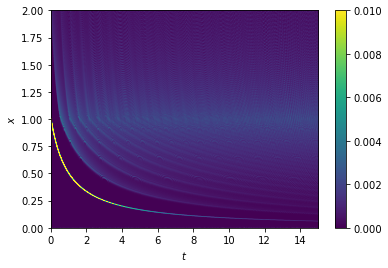

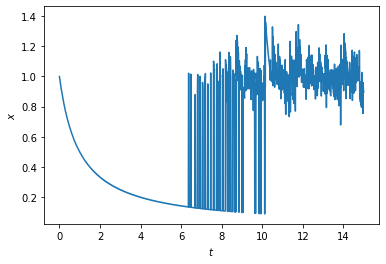

In [9]:
# Set up the grid
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0,2)
x = np.linspace(*grid_extent, n_grid)

# Set up time
n_steps = 1500
delta = 0.01
t = np.linspace(0, n_steps*delta, n_steps)

# Set up the initial state (delta in this case)
psi = kvn.psi0(x, 1)

# Generate the Hamiltonian to solve generic quadratic ODE, 
# i.e. ax^2 + bx + c where a,b,c are in params list
params = (-1,0,0)
#H = kvn.KvN_hamiltonian(x, params)

# Time evolve the state
#psi_store = kvn.time_evolution(H, psi, delta, n_steps)

# Plot the results
#kvn.plot_evolution(x, psi_store, t, save=True)
#kvn.plot_mode(x, psi_store, t, plot_analytical=False, params=(-1,0,0), save=True)
#kvn.plot_std(x, psi_store, t)

H_vec = kvn.KvN_hamiltonian_vec(x, params)
psi_store = kvn.time_evolution(H_vec, psi, delta, n_steps)
kvn.plot_evolution(x, psi_store, t, save=True)
kvn.plot_mode(x, psi_store, t, plot_analytical=False, params=(-1,0,0), save=False)

The following code uses a Gaussian distribution as the initial state

Initializing the state


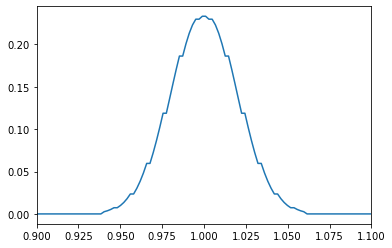

6.017824881849649
Generating the Hamiltonian


 54%|█████▍    | 556/1024 [01:05<00:55,  8.44it/s]


KeyboardInterrupt: 

In [3]:
# Set up the grid
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0,2)
x = np.linspace(*grid_extent, n_grid)

# Set up time
n_steps = 1000
delta = 0.01
t = np.linspace(0, n_steps*delta, n_steps)

# Set up the initial state (delta in this case)
psi = kvn.psi0(x, 1, type='gaussian', std=0.02, n_bins=50)

print(sum(psi))

# Generate the Hamiltonian to solve generic quadratic ODE, 
# i.e. ax^2 + bx + c where a,b,c are in params list
params = (1,0,0)
H = kvn.KvN_hamiltonian(x, params)

# Time evolve the state
psi_store = kvn.time_evolution(H, psi, delta, n_steps)

# Plot the results
kvn.plot_evolution(x, psi_store, t, save=True)
kvn.plot_mode(x, psi_store, t, save=True)
kvn.plot_std(x, psi_store, t, log=True, save=True)